#1. 시각화를 위한 라이브러리 설치

In [ ]:
## using graphviz 
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

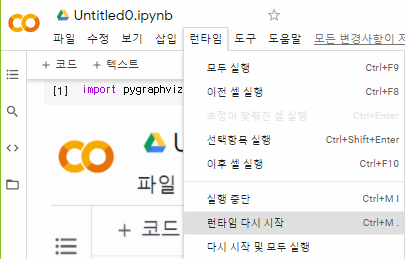

> 설치 완료 후 런타임 -> 런타임 다시 시작 실행

#2. 모델 만들기

##2.1 데이터 추출
> iris 데이터를 읽어 들여 훈련데이터와 테스트 데이터를 7:3으로 분리하여 추출하시오

In [1]:
from sklearn.datasets import load_iris

# iris 데이터 얻기
iris = load_iris()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=62)
X_train[:3]

> 훈련 데이터와 검증 데이터를 받기 위해 train_test_split 함수를 이용한다. 데이터, 결과 데이터, 검증데이터 비율, 랜덤값 순으로 파라미터를 입력하면 되며 반환값은 훈련 데이터, 검증 데이터, 훈련 결과 데이터, 검증 결과 데이터 순으로 반환된다.

##2.2 모델 학습

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# 모델 로드
dt_clf = DecisionTreeClassifier()
# 학습을 통한 모델 생성
dt_clf.fit(X_train, y_train)

##2.3 시각화

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file='tree.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                impurity=True, 
                filled=True)

> export_graphviz 함수는 그래프로 시각화 하기 위한 출력 파일을 생성한다.
- decision_tree : 첫 인자로 학습이 완료된 모델이다.
- out_file : 그래프를 그릴 파일명을 지정한다.
- class_names : target_name을 지정한다ㅏ.
- feature_names : feature_name을 지정한다.
- impurity 기본값은 False이며 True일 경우 노드의 클래스가 구분되도록 색을 칠한다.
- filled : True 시 불순율 표시(gini)

In [5]:
ls

sample_data/  tree.dot


>ls는 리눅스 명령어로 현재 경로의 디렉토리 및 파일을 보여준다.

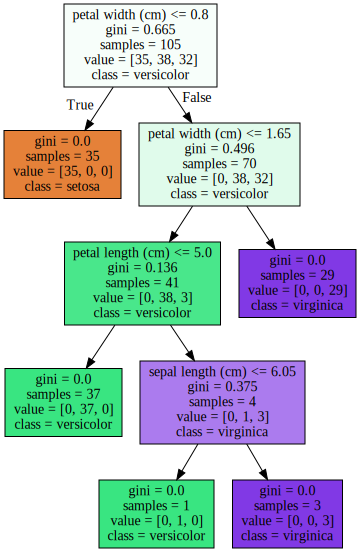

In [8]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
  # print(dot_graph)

graphviz.Source(dot_graph)

> 각 노드별로 다음과 같은 의미를 갖는다.
- 첫 번째 나타나는 조건식은 다음 내용을 분류하기 위한 기준이 된다.
- gini는 여러 종류의 데이터가 섞여 있는 비율을 의미하며 0이면 하나의 종류만 있는 것이다.
- samples는 데이터의 개수를 의미한다.
- value는 데이터의 종류별 건수를 의미하다.
- class는 최종 분류 결과이다.

> 루트 노드에서 꽃잎의 폭이 0.8이하이면 setosa이다. 

> 두 번째 노드에서 꽃잎의 폭이 1.65 초과이면 virginica이다. 

> 세 번째 노드에서 꽃잎의 길이가 5이하이면 versicolor이다. 5초과인 경우 samples의 수가 4이므로 더 분류를 안하는 것이 좋다. 더 나뉘게 되면 과적합되어 예측률이 떨어 질 수 있다. 

위의 내용을 기반으로 잘 분석하여 적당한 파라미터를 지정하고 성능 높은 모델을 생성하면 된다.

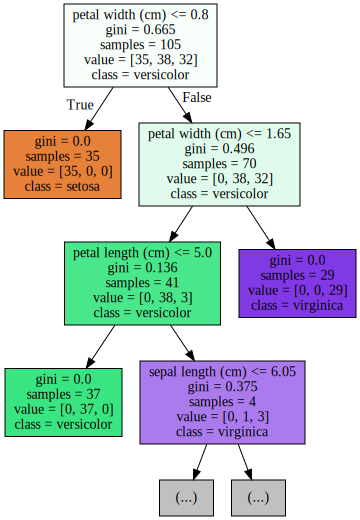

In [9]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_clf, out_file='tree.dot', 
                class_names=iris.target_names, 
                feature_names=iris.feature_names, 
                impurity=True, 
                filled=True,
                #  max_depth의 수치를 낮춤으로써 과적합을 해소할 수 있다.
                max_depth=3)

with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

##2.4 feature 중요도

###2.4.1 feature 중요도 확인

In [10]:
dt_clf.feature_importances_

array([0.02148118, 0.        , 0.05815636, 0.92036246])

> feature_importances_는 feature의 중요도를 뜻하는 것으로 수치가 클 수록 중요한 feature이다. 중요도가 높은 feature를 우선적으로 루트에서 분류하고 점차 낮은 feature로 분류를 마무리하게 된다.

In [13]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
  print(name, round(value, 2))

sepal length (cm) 0.02
sepal width (cm) 0.0
petal length (cm) 0.06
petal width (cm) 0.92
